<a href="https://colab.research.google.com/github/Sergio-Abanto/Analisis_de_Sentimientos-Pronabec-Beca18/blob/main/Pronabec_Beca18_AnalisisSentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Paquetes iniciales a cargar**

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
# pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Carga del Dataset**

In [9]:
data = pd.ExcelFile('/content/drive/MyDrive/DSRP-Proyecto_PRONABEC-NLP/Dataset_PRONABEC_160.xlsx')

df1 = data.parse(0)
print(df1)

                                               Opinión Percerpción  Etiqueta
0    A los jóvenes esta beca ya les cambió la vida ...    Positivo         1
1    En el caso de ellos tanto la educación como la...    Positivo         1
2    Yo creo que el principal impacto es personal. ...    Positivo         1
3    En el instituto a veces los profesores nos dic...    Negativo         0
4    La mayor parte del tiempo lo pasamos entre nos...    Negativo         0
..                                                 ...         ...       ...
155  Ahora, están muy motivados. Antes de Beca 18, ...    Positivo         1
156  Los jóvenes becarios se sienten muy contentos ...    Positivo         1
157  Quiero ser profesional, sobresalir, Beca 18 me...    Positivo         1
158  Cuando no existía Beca 18, las jóvenes estudia...    Positivo         1
159  Los gestores, bien, nos ayudan bastante, están...    Positivo         1

[160 rows x 3 columns]


**NUBE DE PALABRAS ANTES DE TODO PREPROCESAMIENTO:**

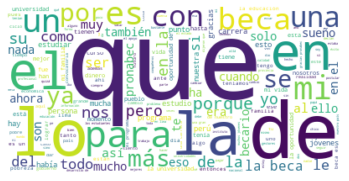

In [10]:
# NUBE DE PALABRAS ANTES DE TODO PREPROCESAMIENTO:
opiniones = ' '.join(df1.Opinión)
opiniones_minusc = opiniones.lower()

cloud_0 = WordCloud(background_color='white').generate(opiniones_minusc)
plt.imshow(cloud_0, interpolation='bilinear')
plt.axis('off')
plt.show()

**Definición de StopWords**

In [11]:
# STOPWORDS
stopword_es = nltk.corpus.stopwords.words('spanish') # stopword_es = stopwords.words('spanish')
print(stopword_es)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

**NUBE DE PALABRAS DESPUÉS DE PREPROCESAMIENTO:**


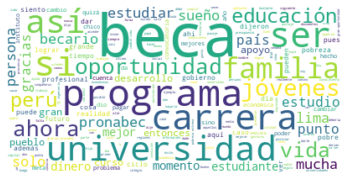

In [12]:
# NUBE DE PALABRAS DESPUÉS DE PREPROCESAMIENTO:
cloud_1 = WordCloud(regexp= r'\b[^\d\W][^\d\W]+\b', background_color='white', stopwords=stopword_es).generate(opiniones_minusc)
plt.imshow(cloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

**Bag of Words obetenido mediante CountVectorizer()**

In [14]:
# 1. BAG OF WORDS - CountVectorizer()
vect = CountVectorizer(token_pattern= r'\b[^\d\W][^\d\W]+\b', stop_words = stopword_es)
vect.fit(df1.Opinión)
pares_vectores_bow = vect.transform(df1.Opinión)
BOW = pd.DataFrame(pares_vectores_bow.toarray(), columns=vect.get_feature_names())
print(BOW)
BOW['etiqueta'] = df1.Etiqueta
print(BOW)

     abancay  abandono  abierto  abril  ...  último  últimos  única  único
0          0         0        0      0  ...       0        0      0      0
1          0         0        0      0  ...       0        0      0      0
2          0         0        0      0  ...       0        0      0      0
3          0         0        0      0  ...       0        0      0      0
4          0         0        0      0  ...       0        0      0      0
..       ...       ...      ...    ...  ...     ...      ...    ...    ...
155        0         0        0      0  ...       0        0      0      0
156        0         0        0      0  ...       0        0      0      0
157        0         0        0      0  ...       0        0      0      0
158        0         0        0      0  ...       0        0      0      0
159        0         0        0      0  ...       0        0      0      0

[160 rows x 1720 columns]
     abancay  abandono  abierto  abril  ...  últimos  única  único  etiqu

**Regresión Logística | Bag of Words - CountVectorizer() | Accuracy y Matriz de Confusión**

In [15]:
# DEFINIR "X" - "y" | REGRESIÓN LOGÍSTICA | BAG OF WORDS - CountVectorizer()
y_BOW = BOW.etiqueta
X_BOW = BOW.drop('etiqueta', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_BOW, y_BOW, test_size=0.35, random_state=123, stratify=y_BOW)
log_reg_BOW = LogisticRegression().fit(X_train, y_train)
y_test_predicted = log_reg_BOW.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_test_predicted), 2))
print('2. Confusion matrix of test data: \n', confusion_matrix(y_test, y_test_predicted))
print('3. Confusion matrix of test data: \n', confusion_matrix(y_test, y_test_predicted)/len(y_test))

1. Accuracy on the test set:  0.88
2. Confusion matrix of test data: 
 [[24  4]
 [ 3 25]]
3. Confusion matrix of test data: 
 [[0.42857143 0.07142857]
 [0.05357143 0.44642857]]


**Bag of Words obetenido mediante TfidVectorizer()**

In [16]:
# 2. BAG OF WORDS - TfidfVectorizer()
vect = TfidfVectorizer(token_pattern= r'\b[^\d\W][^\d\W]+\b', stop_words = stopword_es)
vect.fit(df1.Opinión)
pares_vectores_TD_VECT = vect.transform(df1.Opinión)
TD_VECT = pd.DataFrame(pares_vectores_TD_VECT.toarray(), columns=vect.get_feature_names())
print(TD_VECT)
TD_VECT['etiqueta'] = df1.Etiqueta
print(TD_VECT)

     abancay  abandono  abierto  abril  ...  último  últimos  única  único
0        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
1        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
2        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
3        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
4        0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
..       ...       ...      ...    ...  ...     ...      ...    ...    ...
155      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
156      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
157      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
158      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0
159      0.0       0.0      0.0    0.0  ...     0.0      0.0    0.0    0.0

[160 rows x 1720 columns]
     abancay  abandono  abierto  abril  ...  últimos  única  único  etiqu

**Regresión Logística | Bag of Words - TdIdf() | Accuracy y Matriz de Confusión**

In [17]:
# DEFINIR "X" - "y" | REGRESIÓN LOGÍSTICA | BAG OF WORDS - TfidfVectorizer()
y_TD_VECT = TD_VECT.etiqueta
X_TD_VECT = TD_VECT.drop('etiqueta', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_TD_VECT, y_TD_VECT, test_size=0.35, random_state=123, stratify=y_BOW)

log_reg_TD_VECT = LogisticRegression().fit(X_train, y_train)
y_predicted = log_reg_TD_VECT.predict(X_test)
print('1. Accuracy on the test set: ', round(accuracy_score(y_test, y_predicted),2))
print('2. Confusion matrix of test data: \n', confusion_matrix(y_test, y_predicted))
print('3. Confusion matrix of test data: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

1. Accuracy on the test set:  0.86
2. Confusion matrix of test data: 
 [[25  3]
 [ 5 23]]
3. Confusion matrix of test data: 
 [[0.44642857 0.05357143]
 [0.08928571 0.41071429]]
